<a href="https://colab.research.google.com/github/Adyel/Digital-Image-Processing/blob/master/%5BCSE428%5D_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[DIP] Histogram Equalization (HE)
**Task**: Implement '*Histogram Equalization (HE) on an 8-bit gray scale image*'.  
**Input**: Provided Image  
**Output**: Input Image Histogram, Histogram Equalized Outputs, Output Images Histogram  
**Platform**: Python  
**Report**: (Should Contain)
*   Brief description on algorithm of Histogram Equalization.
*   Input and output of Histogram Equalization.
*   Discussion on the output obtained and benefits of Histogram Equalization.
*   Compare your results with text book figures.
*   Results obtained applying HE again (2nd time) on first equalized output.
*   Analysis of getting 2nd output.
*   Printed Copy of the work

**Code**: You CANNOT take help of built-in library functions while implementing the HE. Use of library functions are limited to Reading and Displaying figures.  
**Deadline**: 26 October 2019

## Import Libraries
**PIL** will be used to read the image file.  
**numpy** is necessary to manipulate array.  
**matplotlib** to print the image after transformation and to plot graph

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

##Helper Function

In [0]:
def create_histogram(img_array):
  flat = img_array.flatten()
  histogram = np.zeros(256, dtype=np.uint)

  for i in range(len(flat)):
    histogram[ flat[i] ] += 1

  return histogram


def cumalative_sum(_histogram):
  _histogram = iter(_histogram)
  current_point = [next(_histogram)]
  for i in _histogram:
      current_point.append(current_point[-1] + i)
  return np.array(current_point, dtype=np.uint)


def transform_image(__image_array : np.ndarray, __transform_array : np.ndarray):
  row, col = __image_array.shape
  new_img = np.zeros_like(__image_array)
  # applying transfered values for each pixels
  for i in range(0, row):
	  for j in range(0, col):
		  new_img[i, j] = __transform_array[__image_array[i, j]]
  
  return new_img

##Open The Image
Open the file and transform it to 2d array.  
Also, pritining the Image to get an idea.

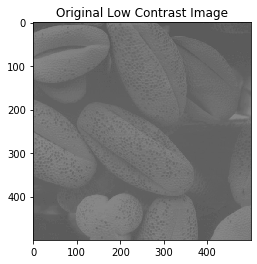

In [0]:
image = Image.open("figure_low_contrast.jpg")
image_array = np.asarray(image)

plt.imshow(image, cmap = 'gray', vmax=255, vmin=0)
plt.title("Original Low Contrast Image")
plt.show()

##Draw Graphs


###Histogram

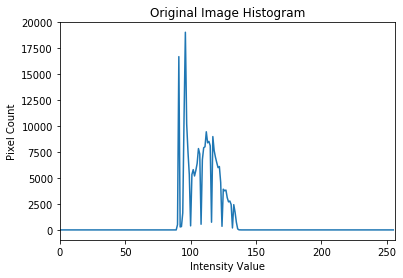

In [0]:
histogram = create_histogram(image_array)

# plt.figure()
plt.title("Original Image Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.xlim([0, 256])

plt.plot(histogram)
plt.show()

###Cumalative Distribtuion Frequency

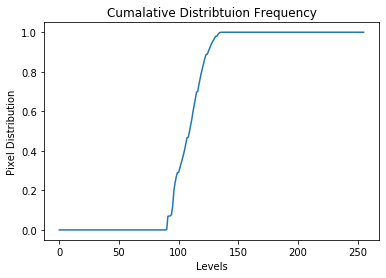

In [0]:
cs = cumalative_sum(histogram)


n_j = (cs - cs.min())
N = cs.max() - cs.min()

cdf = n_j / N

plt.plot(cdf)
plt.title("Cumalative Distribtuion Frequency")
plt.xlabel("Levels")
plt.ylabel("Pixel Distribution")
plt.show()

##Transfrom The Image



In [0]:
transform = cdf * 255
transform = transform.astype(np.uint8)
new_img = transform_image(image_array, transform)

##Show The Newly Transformed Image

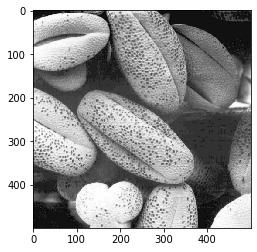

In [0]:
plt.imshow(new_img, cmap = 'gray', vmax = 255, vmin = 0)
plt.show()

##Draw Graphs for new Image

###Histogram

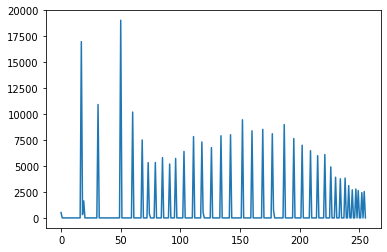

In [0]:
new_histogram = create_histogram(new_img)

plt.plot(new_histogram)
plt.show()

###Cumilative Distribution Frequency

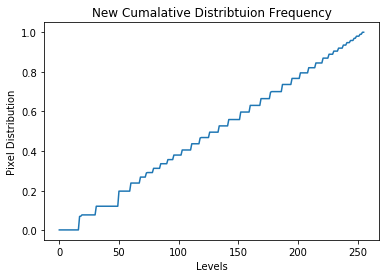

In [0]:
new_cs = cumalative_sum(new_histogram)
new_cdf = new_cs / new_cs.max()
plt.plot(new_cdf)
plt.title("New Cumalative Distribtuion Frequency")
plt.xlabel("Levels")
plt.ylabel("Pixel Distribution")
plt.show()

##Second Transformation
Histogram equalization is idempotent. Meaning applying HE multiple time will  
not change the result.

###Calculate CDF, Cum Sum, histgram

In [0]:
new_hist = create_histogram(new_img)
cumsum = cumalative_sum(new_hist)

n__n_j = (cumsum - cumsum.min())
n__N = cumsum.max() - cumsum.min()

new_cdf = n__n_j / n__N

###Again, Transform to new Image

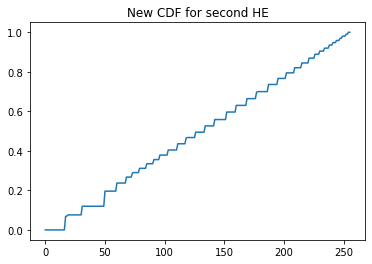

In [0]:
second_transform = new_cdf * 255
second_transform = second_transform.astype(np.uint8)

plt.plot(new_cdf)
plt.title("New CDF for second HE")
plt.show()

###Transform the Image
Transform the image and show it's histogram

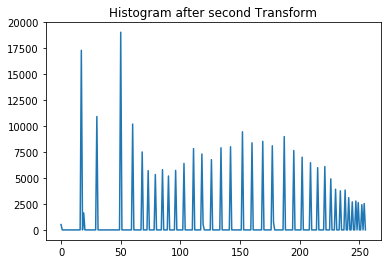

In [0]:
second_img = transform_image(new_img, second_transform)

plt.plot(create_histogram(second_img))
plt.title("Histogram after second Transform")
plt.show()

###Show The Image
Show the image after second HE

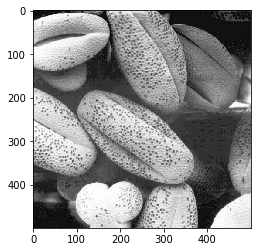

In [0]:
plt.imshow(second_img, cmap = 'gray', vmax = 255, vmin = 0)
plt.show()